In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

In [2]:
start_date = pd.to_datetime('2013-01-28')
end_date = pd.to_datetime('2013-03-22')
tenor = '10Y'
# Shading the study period
study_start = pd.to_datetime('2013-02-25')
study_end = pd.to_datetime('2013-03-22')
phase_start = pd.to_datetime('2013-03-11')
date_nice = f'Feb - Mar 2013' 

In [3]:

# Filter the data for February and March for both datasets
df = pd.read_excel('data/liquidity/relative bid ask spread/Bid-Ask.xlsx', sheet_name='For_plotting')
print(df.head())
df_usd = df[(df['Currency'] == 'USD') & (df['Tenor'] == tenor)]
df_cad = df[(df['Currency'] == 'CAD') & (df['Tenor'] == tenor)]
df_usd_filtered = df_usd[(df_usd['Date'] >= start_date) & (df_usd['Date'] <= end_date)].sort_values(by='Date')
df_cad_filtered = df_cad[(df_cad['Date'] >= start_date) & (df_cad['Date'] <= end_date)].sort_values(by='Date')


        Date        Day  Period Tenor Currency     Bid     Ask  Spread  \
0 2013-02-01     Friday     NaN    5Y      CAD  1.8483  1.8707  0.0224   
1 2013-02-04     Monday     NaN    5Y      CAD  1.7925  1.8145  0.0220   
2 2013-02-05    Tuesday     NaN    5Y      CAD  1.8120  1.8340  0.0220   
3 2013-02-06  Wednesday     NaN    5Y      CAD  1.7956  1.8174  0.0218   
4 2013-02-07   Thursday     NaN    5Y      CAD  1.7931  1.8150  0.0219   

   Midprice  Relative Spread  
0   1.85950         0.012046  
1   1.80350         0.012199  
2   1.82300         0.012068  
3   1.80650         0.012068  
4   1.80405         0.012139  


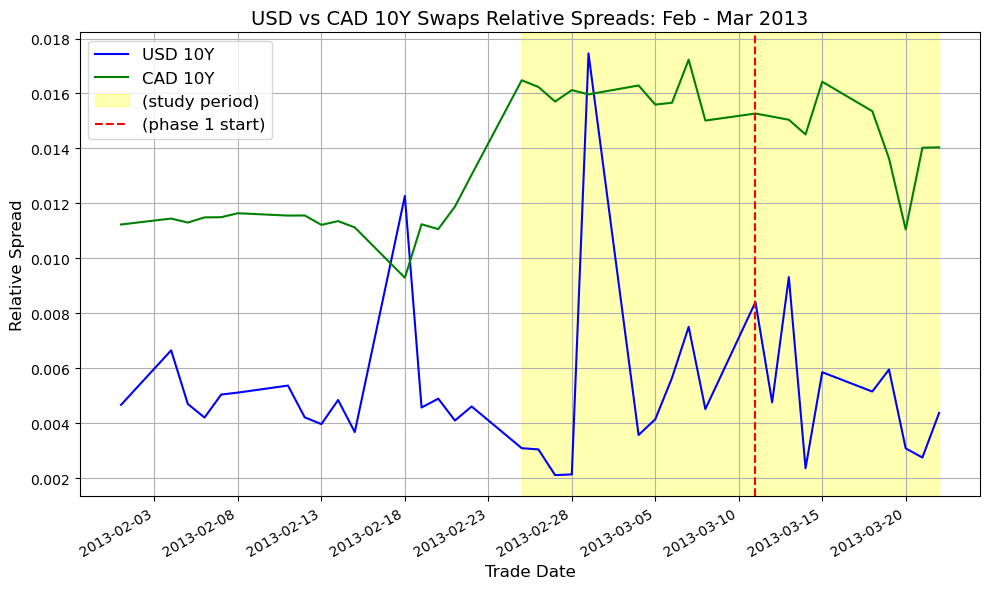

In [4]:
# Re-plotting with additional formatting for study period and phase 1 start

plt.figure(figsize=(10, 6))
plt.plot(df_usd_filtered['Date'], df_usd_filtered['Relative Spread'], label=f'USD {tenor}', color='blue')
plt.plot(df_cad_filtered['Date'], df_cad_filtered['Relative Spread'], label=f'CAD {tenor}', color='green')

plt.axvspan(study_start, study_end, color='yellow', alpha=0.3, label='(study period)')

# Adding a vertical dashed line for phase 1 start
plt.axvline(phase_start, color='red', linestyle='--', label='(phase 1 start)')

# Formatting the plot
plt.title(f'USD vs CAD {tenor} Swaps Relative Spreads: {date_nice}', fontsize=14)
plt.xlabel('Trade Date', fontsize=12)
plt.ylabel('Relative Spread', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate() # Rotation

plt.tight_layout()
plt.show()
